#Laboratorio 2 Inteligencia Artificial

## Repositorio

https://github.com/cor22982/IA/tree/lab2

#Task 1 - Preguntas Teoricas

# ¿Por qué el modelo de Naive Bayes se le considera “naive”?

El algoritmo se considera ingenuo e inocente simplemente porque la suposición en la que se basa al aplicar este modelo casi nunca ocurre en la realidad. Y la base del modelo es que supone que las características de medición son independientes entre sí y contribuyen por igual al resultado.

# Explique la formulación matemática que se busca optimizar en Support Vector Machine, además responda ¿cómo funciona el truco del Kernel para este modelo?



*   En SVM de busca encontrar una linea (hiperplano) que separe los datos de mejor manera, lo ideal es que esta linea tenga la mayor distancia entre los puntos de la misma clase que estan cerca ,la distancia del margen se define como  2/||w|| donde ||w|| es el vector de pesos y define la orientacion del hiperplano y para maximizar el margen se minimiza:  1/2||w||^2 y esta formula esta sujeta a la condicion donde todos los puntos esten clasificados la cual es: y(w * x + b)>= 1, donde w es el vector que difine el hiperplano, b es el sesgo, y es la etiqueta de clase con valores de (+1 o -1) y x son las caracteristicas de los datos.

*   El truco del kernel en las SVM permite resolver problemas donde los datos no son separables linealmente en su espacio original.Y funciona permitiendo que el modelo encuentre un hiperplano óptimo para separar los datos en un espacio de mayor dimensión sin necesidad de transformas los datos a ese nuevo espacio.



# Investigue sobre Random Forest y responda
*   a. ¿Qué tipo de ensemble learning es este modelo?
*   b. ¿Cuál es la idea general detrás de Random Forest?
*   c. ¿Por qué se busca baja correlación entre los árboles de Random Forest?




*   a. El modelo que usa el random forest es el método bagging o embolsado, ya que emplea tanto el embolsado como la aleatoriedad de características para crear un bosque de árboles de decisión que no están correlacionados.

*   b. La idea principal de Random Forest es combinar múltiples árboles de decisión independientes para mejorar la precisión. Cada árbol se entrena con un subconjunto aleatorio de los datos y solo se considera un subconjunto aleatorio de las características y al final las predicciones de todos los arboles se juntan para tener la mejor respuesta.

*   c. La baja correlación entre los árboles es importante porque asegura que cada árbol aprenda patrones diferentes del conjunto de datos. Esto reduce el riesgo de que los errores de un árbol se repitan en otros, lo que mejora la precisión del modelo final.Al combinar árboles poco correlacionados, los errores individuales tienden a cancelarse, haciendo que el modelo sea más robusto y generalizable.



# Task 2 - Naive Bayes: Clasificador de mensajes Ham/Spam

Para las métricas, utlizamos precisión, recall y fscore debido a que el set dataset está desbalanceado
Hay solamente 748 mensajes de spam mientras que hay 4819 mensajes de ham

Manual:

Precision: 0.9817
Recall: 0.9811
F1 Score: 0.9813

Librerías:

Precision: 0.9800
Recall: 0.9802
F1 Score: 0.9801

La diferencia es casi nula, pero el modelo manual sobrepasa al modelo con librerías por una cantidad aproximada
de 0.0010. Esto puede deverse a la diferencia entre la tokenización de nuestro modelo comparado al
CountVectorizer() de scikit-learn. O tal vez debido a alguna diferencia en la implementación de Laplace
comparado con el de scikit. Aunque, podría ser también algo tan simple como alguna optimización a
los cálculos de números decimales que implemente scikit que cause la pequeña discrepacia. En general,
ambos modelos están bastante similares en performance.

# Task 3- Clasificación de Partidas de League of Legends

## 3.1 - Support Vector Machines: Clasificación de Partidas de League of Legends


## Analisis Exploratorio

Vamos a cargar todas las librerias a usar. **texto en negrita**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support,  f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Ahora cargamos los datos

In [ ]:
csv_file_path = './high_diamond_ranked_10min.csv'
df = pd.read_csv(csv_file_path)

Primero vamos a verificar que este balanceado

Se puede ver que estan balanceados pues blueWins tiene 4949 y 4930 de ceros y unos

In [ ]:
ceros = df.loc[df['blueWins'] == 0]
unos = df.loc[df['blueWins'] == 1]
print(ceros["blueWins"].count())
print(unos["blueWins"].count())

4949
4930


### Eleccion de Variables

Eligiremos el blueAvgLevel, blueKills.  

Vamos a usar estas 2 debido a que se intuye que tener un nivel bueno entre los jugadores.

Y tambien al tener muchas muertes causadas pueden provocar que gananen la partida

Aqui estan el rango de valores

In [ ]:
print(f"Promedio de nivel de los Azules {df['blueAvgLevel'].min()} - {df['blueAvgLevel'].max()}")
print(f"Muertes causadas por los Azules {df['blueKills'].min()} - {df['blueKills'].max()}")

Promedio de nivel de los Azules 4.6 - 8.0
Muertes causadas por los Azules 0 - 22


No es necesario escalarlas ni mapearlas , tampoco normalizarlas. Por lo que se usara como estan

## PARTE 3.2 Support Vector Machines  Clasificación de Partidas de League of Legends

Vamos a dividir en 3 test , entrenamiento y

In [ ]:
X = df[['blueAvgLevel','blueKills']].values
Y = df['blueWins'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


### Implementacion Clase

Vamos a definir una classe llama SVM_Manual en donde como podemos ver tiene 2 deltas, que sirven al momento de elegir sobre la condicion el gradiente a usar.

In [ ]:
class SVM_manual ():
  def __init__(self, learning_rate , epocas, lambda_par):
    self.learning_rate = learning_rate
    self.epocas = epocas
    self.lambda_par = lambda_par
    self.w = None
    self.b = None

  def delta_j_w_1(self, w):
    return self.learning_rate * (2 * self.lambda_par * w)

  def delta_j_w_2(self, w, x_i, y_i):
    return self.learning_rate * (2 * self.lambda_par * w - np.dot(x_i, y_i))

  def algoritmo_sin_librerias_fit(self, X, Y):
    _, n_s = X.shape

    y = np.where(Y <= 0, -1, 1)
    self.w = np.zeros(n_s) #llenamos el vector de pesos con 0's
    self.b = 0

    for i in range(self.epocas):
       for j, x_i in enumerate(X):
        condition = y[j] * (np.dot(x_i, self.w) - self.b) >= 1
        if condition:
          self.w -= self.delta_j_w_1(self.w)
        else:
          self.w -= self.delta_j_w_2(w=self.w, x_i=x_i, y_i=y[j])
          self.b -=  self.learning_rate * y[j]
       if i % 100 == 0:
         print(f"Epoca actual {i}")

  def algoritmo_sin_librerias_prediccion(self, X_test):
     y_predichas = np.dot(X_test, self.w) - self.b
     return np.sign(y_predichas)

### Tunning

Primero con 10% de los datos vamos a hacer Tunnig en ambos casos , para ello usaremos una clase creada llamada tunning que lo que hace es ir por un array de elementos para las hipervariables

In [ ]:
class Tunning ():
  def __init__(self, X_val , y_val, X_Train, Y_train):
    self.learning_rates = [0.0001, 0.001, 0.01]
    self.epocas_options = [500, 1000, 2000]
    self.X_val = X_val
    self.y_val =  np.where( y_val <= 0, -1, 1)
    self.X_train = X_Train
    self.y_train = Y_train
    self.lambda_options = [0.001, 0.01, 0.1]
    self.best_acc = 0
    self.best_params = None
    self.best_model = None

    self.param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

  def encontrar_variables(self):
    for lr in self.learning_rates:
      for ep in self.epocas_options:
          for lamb in self.lambda_options:

              model = SVM_manual(learning_rate=lr, epocas=ep, lambda_par=lamb)
              model.algoritmo_sin_librerias_fit(X=self.X_train, Y=self.y_train)

              y_pred = model.algoritmo_sin_librerias_prediccion(X_test=self.X_val)
              acc = accuracy_score(self.y_val, y_pred)

              print(f"Tuning Manual - lr: {lr}, ep: {ep}, lambda: {lamb} -> Acc: {acc:.4f}")

              # Guardar el mejor modelo
              if acc > self.best_acc:
                  self.best_acc = acc
                  self.best_params = (lr, ep, lamb)
                  self.best_model = model

Ahora vamos a ejecutarlo con las variables que tenemos

In [ ]:
#   tunn = Tunning(X_val=X_val, X_Train=X_train, Y_train=y_train, y_val=y_val)
#   tunn.encontrar_variables()



> Estan desabilitadas ya que se tardan un monton en encontrar pero se encontro que lr: 0.001, ep: 2000, lambda: 0.01 -> fue el mejor al tener un acurrancy de 0.6775



Ahora aplicamos tunning al de las librerias usando gridsearch

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
y_val_Trained = np.where(y_val <= 0, -1, 1)
# fitting the model for grid search
grid.fit(X_val, y_val)

#iprimos los hiperparametros.
print(grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.680 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.635 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.640 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.640 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.624 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.652 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf



> Como puedes ver tenemos como hiperparametros finales C = 1000 , y gamma = 0.01



#### Variables a hacer tunning

Nosotros aplicamos al learning rate, a las iteraciones y al lambda tunning ya que son estas las variables, Como consideracion adicinal tuvimos que tomar en cuenta la manera en como se estaba haciendo un mapeo del vector y . Ademas que tuvimos que ajustar 3 valores distintos para los hiperparametros. Por ende se llega a tardar mucho el algoritmo en terminar

###  ENTRENAMIENTO

Ahora lo entrenaremos usando los mejores parametros encontrados antes

#### Manual

In [ ]:
learning_rate = 0.001
epocas = 1000
lambda_par =0.01

svm_manual = SVM_manual(learning_rate=learning_rate, epocas=epocas, lambda_par=lambda_par)
svm_manual.algoritmo_sin_librerias_fit(X=X_train, Y=y_train)

Epoca actual 0
Epoca actual 100
Epoca actual 200
Epoca actual 300
Epoca actual 400
Epoca actual 500
Epoca actual 600
Epoca actual 700
Epoca actual 800
Epoca actual 900


### Con librerias

In [ ]:
y_trained_parametrized = np.where(y_train <= 0, -1, 1 )
clf = svm.SVC(C=1000, gamma=0.01, kernel='rbf')
clf.fit(X_train, y_trained_parametrized)

SVC(C=1000, gamma=0.01)

### Testing

Ahora hacemos el testing y usaremos f1score para comparar despues entre las 2.

In [ ]:
y_test_parametrized = np.where(y_test <= 0, -1, 1)

#### Manual

In [ ]:
y_predic_manual = svm_manual.algoritmo_sin_librerias_prediccion(X_test=X_test)
f1_score_manual = f1_score(y_test_parametrized, y_predic_manual, average='macro')

#### Por librerias

In [ ]:
y_predic_lib = clf.predict(X_test)
f1_score_lib = f1_score(y_test_parametrized, y_predic_lib, average='macro')

Como resultado nos da

In [ ]:
print("F1 SCORE MANUAL: ",f1_score_manual)
print("F1 SCORE LIBRERIA: ",f1_score_lib)

F1 SCORE MANUAL:  0.6523085585585586
F1 SCORE LIBRERIA:  0.6761080514030946


### Graficar

Para graficar definimos una funcion llamada

In [24]:
def graph_smv(data_X, labels_y, model):
    def get_hyperplane_value(x, weights, bias, offset):
        return (-weights[0] * x + bias + offset) / weights[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Graficar los puntos con colores correspondientes
    scatter = plt.scatter(data_X[:, 0], data_X[:, 1], marker="o", c=labels_y, cmap="bwr", edgecolors="k")

    # Crear la frontera de decisión
    x_min = np.amin(data_X[:, 0])
    x_max = np.amax(data_X[:, 0])

    y_min = get_hyperplane_value(x_min, model.w, model.b, 0)
    y_max = get_hyperplane_value(x_max, model.w, model.b, 0)

    y_min_m = get_hyperplane_value(x_min, model.w, model.b, -1)
    y_max_m = get_hyperplane_value(x_max, model.w, model.b, -1)

    y_min_p = get_hyperplane_value(x_min, model.w, model.b, 1)
    y_max_p = get_hyperplane_value(x_max, model.w, model.b, 1)

    ax.plot([x_min, x_max], [y_min, y_max], "y--", label="Hiperplano de decisión")
    ax.plot([x_min, x_max], [y_min_m, y_max_m], "k", label="Margen -1")
    ax.plot([x_min, x_max], [y_min_p, y_max_p], "k", label="Margen +1")

    y_range_min = np.amin(data_X[:, 1])
    y_range_max = np.amax(data_X[:, 1])
    ax.set_ylim([y_range_min - 3, y_range_max + 3])

    ax.set_xlabel("blueAvgLevel")
    ax.set_ylabel("blueKills")
    ax.set_title("SVM - Frontera de decisión")

    # Agregar leyenda para los colores de los puntos
    legend_labels = {1: "Blue Wins", -1: "Blue Loose"}
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor="red", markersize=8, label="Blue Wins"),
               plt.Line2D([0], [0], marker='o', color='w', markerfacecolor="blue", markersize=8, label="Blue Loose")]

    ax.legend(handles=handles, loc="upper right")

    plt.show()


#### Grafico del Manual

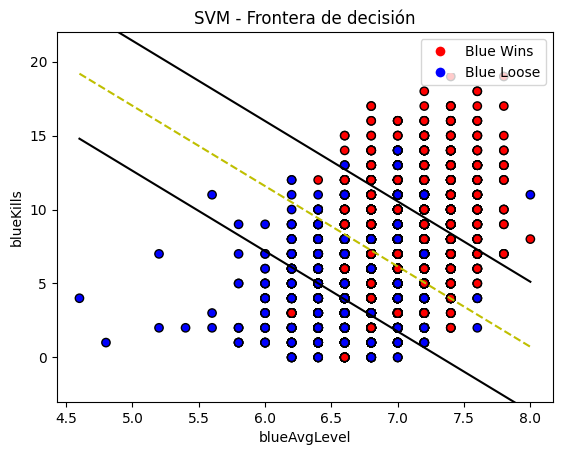

In [25]:
graph_smv(data_X=X_train, labels_y=y_trained_parametrized, model=svm_manual)

#### ¿Cuál implementación fue mejor? ¿Por qué?

En lo general ambas rindieron bastante bien debido a que si vemos el f1_score , podemos ver que quedaron de 0.65 y 0.67 lo que indica que si bien no son modelos muy buenos, son buenos y tienen cierto margen de mejora. Por obvias razones la de con librerias debido a que hace implementacion de una manera mas rapida , producto de utilizar funciones propias y diseñadas para el algoritmo. A pesar de ello siguen siendo buenos modelos.

## PARTE 3.3 - Comparación

### ¿Cómo difirieron los grupos creados por ambos modelos?

En ambos grupos se observa una misma division  por ende en realidad no hubo tanta diferencia ya que para esta tarea se utilizo modelos similares y con un rendimiento casi identico

### ¿Cuál de los modelos fue más rápido?

El modelo mas rapido fue el de SVM de sklearn , de hecho en el modelo creado manualmente por cada 100 epocas se tardaba en ejecutar , muy posiblemente ya que el hecho por librerias fue optimizado ya sea usando SDG, o porque fue programado de una manera completamente distinta. Pero me inclino por la parte que usaron SDG y agarraron una pareja de variables de las que debian iterar.

Tambien puede ser que utilizaron en c++ alguna forma para realizar paralelismo.

### ¿Qué modelo usarían?

En lo personal usaria el modelo de sklearn debido a que tiene muchas mas opciones que se le pueden pasar, y ademas corre mas rapido, lo que para elementos mas grandes puede ser muy facil de usar.



# Referencias

Github: https://github.com/cor22982/IA.git

Paginas web:

Dang, K. (2022, 17 noviembre). Why Naive Bayes is called “naive”? and what are the benefits of being “naive”? Medium. https://medium.com/@kirudang/why-naive-bayes-is-called-naive-and-what-are-the-benefits-of-being-naive-180757155b69
Jain, A. (2024, 16 noviembre). SVM kernels and its type - Abhishek Jain - Medium. Medium. https://medium.com/@abhishekjainindore24/svm-kernels-and-its-type-dfc3d5f2dcd8

Ibm. (2024b, octubre 8). Random Forest. IBM. https://www.ibm.com/mx-es/topics/random-forest


